In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Bollywood/data.csv')
print(df)

Mounted at /content/drive
     SlNo Release Date                    MovieName ReleaseTime     Genre  \
0       1    18-Apr-14                     2 States          LW   Romance   
1       2     4-Jan-13                 Table No. 21           N  Thriller   
2       3    18-Jul-14           Amit Sahni Ki List           N    Comedy   
3       4     4-Jan-13             Rajdhani Express           N     Drama   
4       5     4-Jul-14                 Bobby Jasoos           N    Comedy   
..    ...          ...                          ...         ...       ...   
144   145    27-Feb-15           Dum Laga Ke Haisha           N    Comedy   
145   146    13-Mar-15                         NH10           N  Thriller   
146   147    20-Mar-15  Dilliwali Zaalim Girlfriend           N    Comedy   
147   148    20-Mar-15                     Hunterrr           N    Comedy   
148   149    23-May-14                Kochadaiiyaan          HS    Action   

     Budget  BoxOfficeCollection  YoutubeViews  Y

Q1: Number of Records = 149

Metadata:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 149 non-null    int64  
 1   ReleaseDate          149 non-null    object 
 2   MovieName            149 non-null    object 
 3   ReleaseTime          149 non-null    object 
 4   Genre                149 non-null    object 
 5   Budget               149 non-null    int64  
 6   BoxOfficeCollection  149 non-null    float64
 7   YoutubeViews         149 non-null    int64  
 8   YoutubeLikes         149 non-null    int64  
 9   YoutubeDislikes      149 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 11.8+ KB
None

Q2: Movies released by genre:
 Genre
Comedy      36
Drama       35
Thriller    29
Romance     25
Action      24
Name: count, dtype: int64
Genre with most releases: Comedy

Q3: Cross-tab o

/tmp/ipython-input-4226301546.py:53: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Budget'], shade=True)


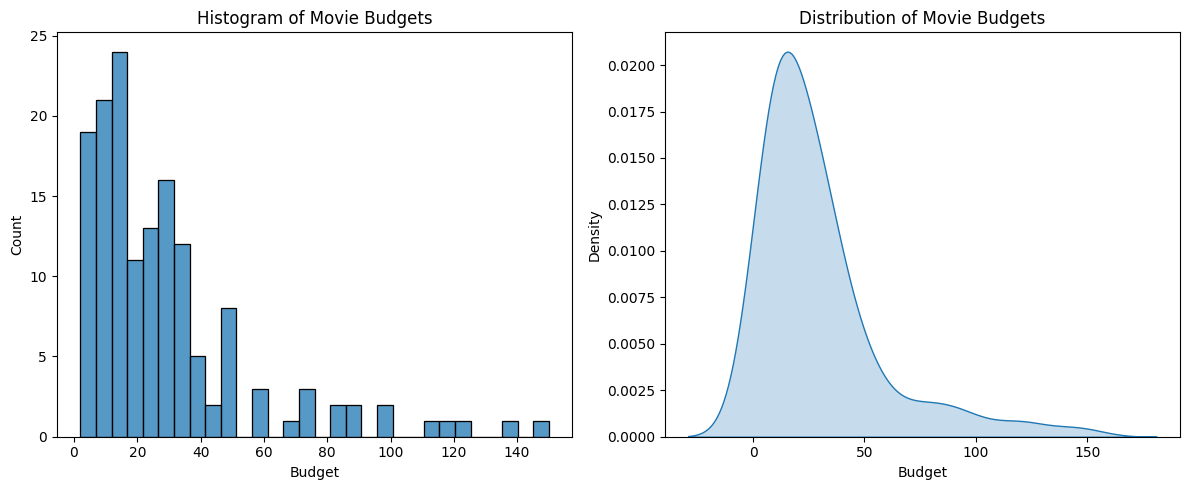

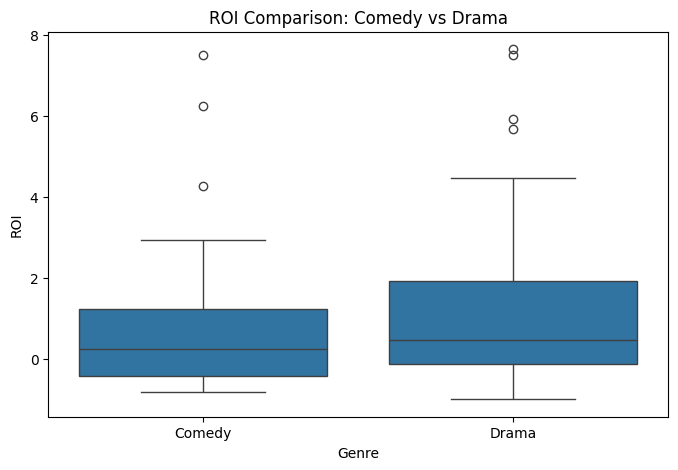


Q10: Correlation between BoxOfficeCollection and YoutubeLikes = 0.6825165877731297


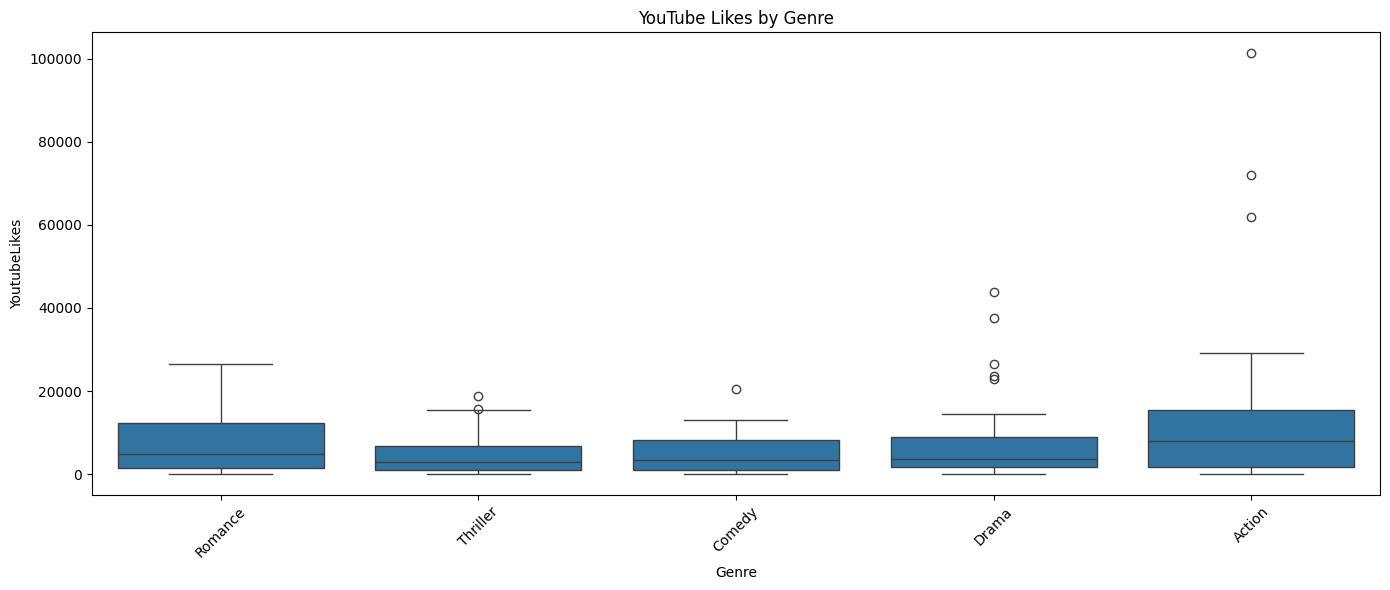


Q12: Correlation Matrix:
                        Budget  BoxOfficeCollection  YoutubeViews  \
Budget               1.000000             0.650401      0.589038   
BoxOfficeCollection  0.650401             1.000000      0.588632   
YoutubeViews         0.589038             0.588632      1.000000   
YoutubeLikes         0.608916             0.682517      0.884055   
YoutubeDislikes      0.665343             0.623941      0.846739   

                     YoutubeLikes  YoutubeDislikes  
Budget                   0.608916         0.665343  
BoxOfficeCollection      0.682517         0.623941  
YoutubeViews             0.884055         0.846739  
YoutubeLikes             1.000000         0.859730  
YoutubeDislikes          0.859730         1.000000  


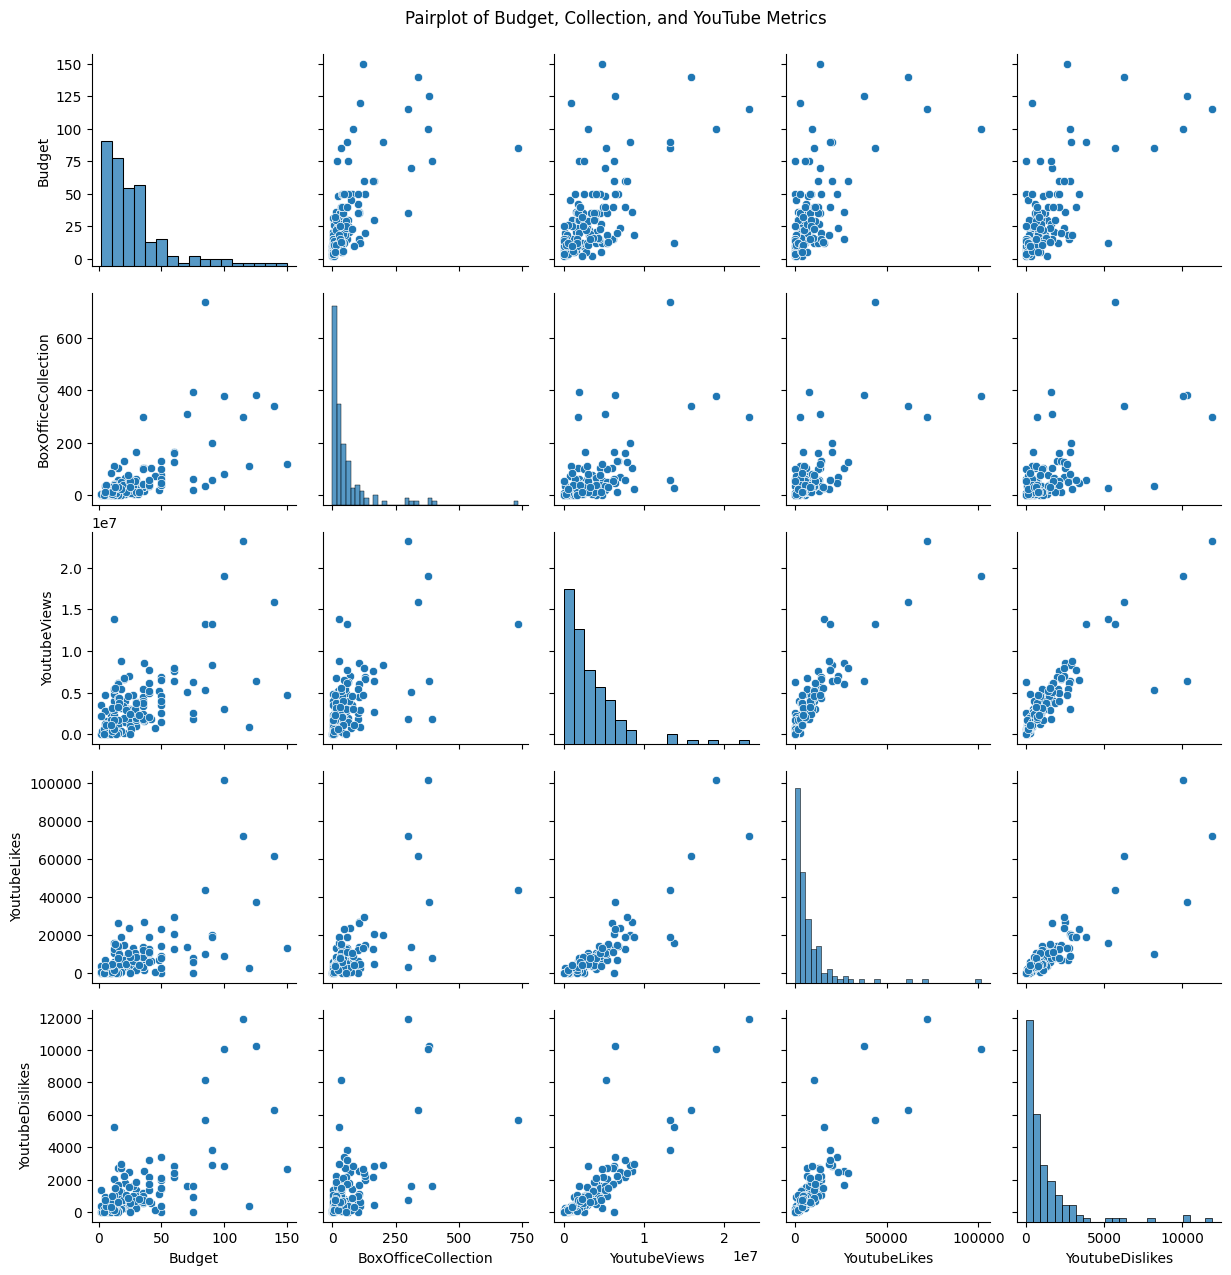

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset

df = pd.read_csv('/content/drive/MyDrive/Bollywood/data.csv')

df.columns = df.columns.str.strip().str.replace(' ', '')

# Question 1
print("Q1: Number of Records =", len(df))
print("\nMetadata:")
print(df.info())

# Question 2
q2 = df['Genre'].value_counts()
print("\nQ2: Movies released by genre:\n", q2)
print("Genre with most releases:", q2.idxmax())

# Question 3
q3 = pd.crosstab(df['Genre'], df['ReleaseTime'])
print("\nQ3: Cross-tab of Genre vs ReleaseTime:\n", q3)

# Question 4
df['ReleaseDate'] = pd.to_datetime(df['SlNo'], errors='coerce')
df['Month'] = df['ReleaseDate'].dt.month
q4 = df['Month'].value_counts().sort_values(ascending=False)
print("\nQ4: Month with most releases:", q4.idxmax())

# Question 5
high_budget = df[df['Budget'] >= 25]
q5 = high_budget['Month'].value_counts()
print("\nQ5: Month with most high-budget movies (>=25 crore):", q5.idxmax())

# Question 6
df['ROI'] = (df['BoxOfficeCollection'] - df['Budget']) / df['Budget']
q6 = df[['MovieName', 'ROI']].sort_values(by='ROI', ascending=False).head(10)
print("\nQ6: Top 10 Movies by ROI:\n", q6)

# Question 7
q7 = df.groupby('ReleaseTime')['ROI'].mean().sort_values(ascending=False)
print("\nQ7: Avg ROI by Release Time:\n", q7)

# Question 8
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Budget'], bins=30)
plt.title("Histogram of Movie Budgets")

plt.subplot(1, 2, 2)
sns.kdeplot(df['Budget'], shade=True)
plt.title("Distribution of Movie Budgets")
plt.tight_layout()
plt.show()

# Question 9
subset = df[df['Genre'].isin(['Comedy', 'Drama'])]
plt.figure(figsize=(8, 5))
sns.boxplot(data=subset, x='Genre', y='ROI')
plt.title("ROI Comparison: Comedy vs Drama")
plt.show()

# Question 10
corr = df['BoxOfficeCollection'].corr(df['YoutubeLikes'])
print("\nQ10: Correlation between BoxOfficeCollection and YoutubeLikes =", corr)

# Question 11
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Genre', y='YoutubeLikes')
plt.title("YouTube Likes by Genre")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Question 12
num_cols = ['Budget', 'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes', 'YoutubeDislikes']
print("\nQ12: Correlation Matrix:\n", df[num_cols].corr())

sns.pairplot(df[num_cols])
plt.suptitle("Pairplot of Budget, Collection, and YouTube Metrics", y=1.02)
plt.show()
